In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## localisation Département

In [66]:
dep = pd.read_csv("departement_french_2018.csv")
dep.drop(["nuts3","wikipedia","surf_km2"],axis=1,inplace=True)
long=dep["DEPLONG"]
lag=dep["DEPLAT"]
dep.head(10)

,code_insee,nom,DEPLONG,DEPLAT
0,11,Aude,2.413622,43.103254
1,43,Haute-Loire,3.806298,45.128115
2,13,Bouches-du-Rhône,5.086225,43.543055
3,47,Lot-et-Garonne,0.460747,44.367964
4,23,Creuse,2.018230,46.090620
5,19,Corrèze,1.877773,45.357342
6,15,Cantal,2.669045,45.051247
7,91,Essonne,2.243409,48.522615
8,76,Seine-Maritime,1.025786,49.654280
9,38,Isère,5.573985,45.264087


In [64]:
long.shape

(95,)

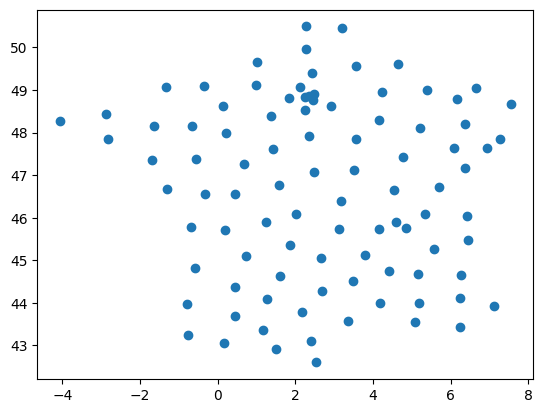

In [55]:
plt.scatter(long,lag)

## Localisation Villes

In [166]:
def Data():
    cit= pd.read_csv("cities.csv")
    cit.drop(["department_code","insee_code","zip_code","slug","id"],axis=1,inplace=True)
    cit.drop(cit[(cit['gps_lat'] <40)].index, inplace=True)
    cit.drop(cit[(cit['gps_lng']<-10)].index, inplace=True)
    cit.drop(cit[(cit['gps_lng']>8)].index, inplace=True)
    return cit
cit=Data()
cit

,name,gps_lat,gps_lng
0,L'Abergement-Clémenciat,46.156782,4.924699
1,L'Abergement-de-Varey,46.010086,5.428759
2,Ambérieu-en-Bugey,45.958409,5.375992
3,Ambérieux-en-Dombes,46.000120,4.910602
4,Ambléon,45.746427,5.602492
...,...,...,...
35608,Wy-dit-Joli-Village,49.097665,1.826260
35610,Les Abymes,46.227638,2.213749
35750,Mamoudzou,46.227638,2.213749
35751,Mamoudzou,46.227638,2.213749


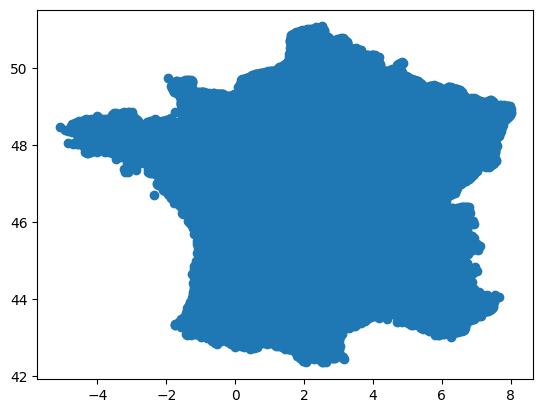

In [167]:
long=cit["gps_lng"]
lag=cit["gps_lat"]
plt.scatter(long,lag)

Dataframe avec quelques villes de France

In [181]:
def villes(liste):
    df = pd.DataFrame(columns =['name', 'gps_lat', 'gps_lng'])
    frames=[]
    for i in range(len(liste)):
        villes_ligne=Cities(liste[i])
        frames.append(villes_ligne)
    for i in range(len(frames)):
        df=pd.concat([df,frames[i]])
    return df

In [169]:
def Cities(ville):
    tab=cit.drop(cit[(cit['name']!=ville)].index)
    tab.drop_duplicates(subset ="name", keep = 'first', inplace=True)
    return tab

,"Nantes","Strasbourg","Orléans","Lourdes","Chambéry","Besançon","Toulouse","Nice","Dijon","Calais","Lyon"

Rajout de colonne température :

In [231]:
liste=["Angers","Chartres","Paris","Marseille","Bordeaux","Lille","Nantes","Strasbourg","Orléans","Lourdes","Chambéry","Besançon","Toulouse","Nice","Dijon","Calais","Lyon"]
vl=villes(liste)
vl
val=[7,5,7,9,8,5,8,3,5,5,3,3,9,9,2,5,5]
vl['valeur']=val
vl

,name,gps_lat,gps_lng,valeur
17908,Angers,47.501835,-0.517146,7
10208,Chartres,48.448704,1.499690,5
29899,Paris,48.864049,2.331053,7
4419,Marseille,43.300771,5.382177,9
12634,Bordeaux,44.835009,-0.587269,8
22657,Lille,50.613811,3.042360,5
16661,Nantes,47.223959,-1.540806,8
27115,Strasbourg,48.601986,7.783522,3
16992,Orléans,47.910833,1.915798,5
26250,Lourdes,43.109618,-0.083287,5


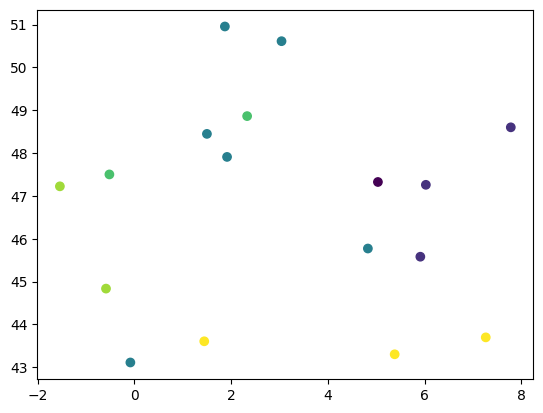

In [236]:
plt.scatter(vl["gps_lng"],vl["gps_lat"],c=vl["valeur"])

In [234]:
vl.to_csv(r'villes.csv', index=False)

## Skgstats

In [238]:
import numpy as np 
import skgstat as skg 

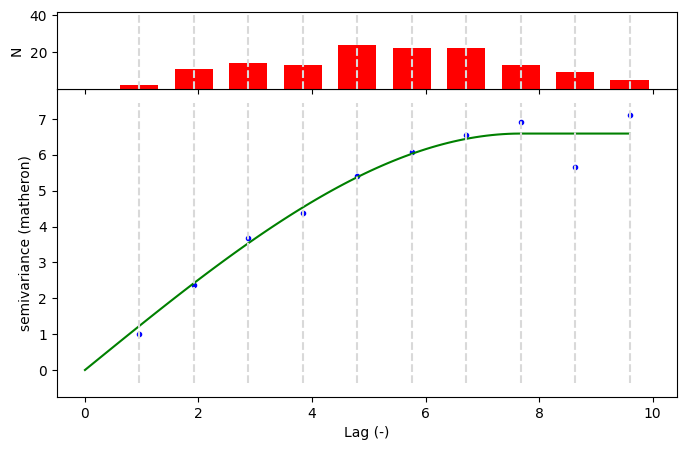

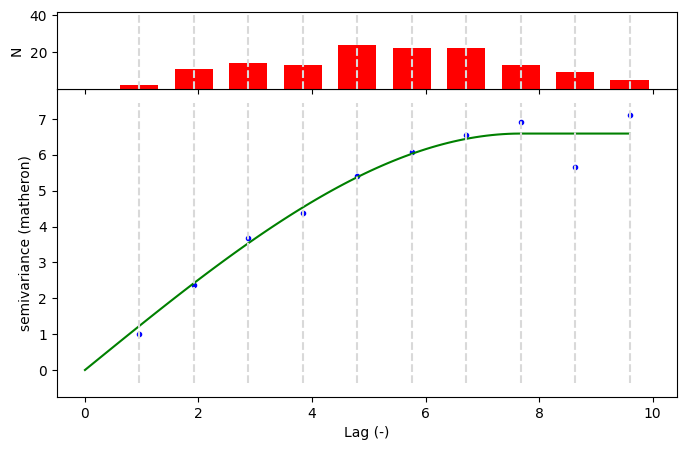

In [323]:
vg = skg.Variogram(vl[['gps_lat', 'gps_lng']].values, vl.valeur.values, normalize=False)
vg.plot(show=False)

In [324]:
vg.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 73.62867109349693,
 'normalized_sill': 46.82305601703452,
 'normalized_nugget': 0,
 'effective_range': 7.674118916848629,
 'sill': 6.594796622117537,
 'nugget': 0,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'even',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': False,
  'maxlag': None,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

In [325]:
ok = skg.OrdinaryKriging(vg)

In [329]:
x = vl['gps_lat']
y = vl['gps_lng']
xx, yy = np.mgrid[x.min():x.max(), y.min():y.max()]

In [330]:
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

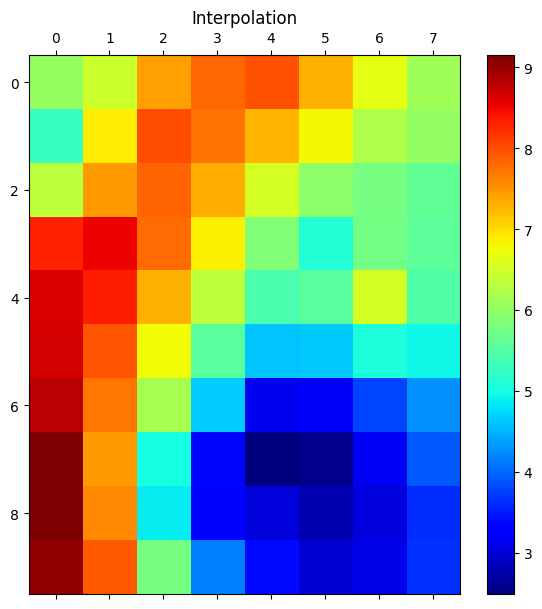

In [331]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.scatter(vl['gps_lng'], vl['gps_lat'], c = vl['valeur'], cmap='jet')
m = ax.matshow(field.T, cmap = 'jet')
plt.title('Interpolation')
plt.colorbar(m)
plt.show()